**Task 01**

**Prediction house prices**

**Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.**

In [1]:
# import utils tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

In [2]:
!pwd


/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Descriptive statistics

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Separate numeric and categorical variables

numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print(f"number of numerical features: {numeric_data.shape[1]},\nnumber of categorical features: {categorical_data.shape[1]}")

number of numerical features: 38,
number of categorical features: 43


## Cleaning Data




### Handle missing values

In [8]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [9]:
# count missing values for each columns
missing_values = df.isnull().sum()
missing_values

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [10]:
# Show columns with missing values
columns_with_missing = missing_values[missing_values > 0]
print("Columns with missing values:", columns_with_missing)



Columns with missing values: LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [11]:
# Now, we separate these columns into categorical and numeric columns
categorical_columns = []
numeric_columns = []

for col in columns_with_missing.index:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric_columns.append(col)
    else:
        categorical_columns.append(col)

print("Categorical columns with missing values:", categorical_columns)
print("Numeric columns with missing values:", numeric_columns)

Categorical columns with missing values: ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Numeric columns with missing values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [12]:
df_copy = df.copy() #Create a copy of our dataset
df_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Little’s MCAR Test

In [13]:
!pip install pyampute


In [14]:
from pyampute.exploration.mcar_statistical_tests import MCARTest
mt = MCARTest(method="little")
r = mt.little_mcar_test(numeric_data)
print(r)



0.0




*   If p-value > 0.05: The missing data is likely to be Missing Completely at Random (MCAR), meaning the missingness is unrelated to the data itself.
*   If p-value < 0.05: The missing data is likely not MCAR, suggesting that the data may be either Missing at Random (MAR) or Missing Not at Random (MNAR).

Dummy Variables for Missingness

In [15]:
# Example for creating dummy variables for missing data
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col + '_missing'] = df[col].isnull().astype(int)

 t-tests for Numeric Columns

In [16]:
from scipy.stats import ttest_ind
s = 0
# Loop through the 19 columns with missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        # Perform t-tests for numeric columns
        for num_col in numeric_columns:
            if num_col != col:  # Skip if comparing the same column
                t_stat, p_val = ttest_ind(df[df[col + '_missing'] == 1][num_col].dropna(),
                                          df[df[col + '_missing'] == 0][num_col].dropna(),
                                          equal_var=False)
                s = s + 1
                #if p_val < 0.05:

                print(f'T-test for missingness in {col} and {num_col}:, sum: {s} p-value = {p_val}')

T-test for missingness in LotFrontage and MasVnrArea:, sum: 1 p-value = 0.6241320790421863
T-test for missingness in LotFrontage and GarageYrBlt:, sum: 2 p-value = 0.8864957238710816
T-test for missingness in Alley and LotFrontage:, sum: 3 p-value = 9.339596282553186e-11
T-test for missingness in Alley and MasVnrArea:, sum: 4 p-value = 0.15166237259286516
T-test for missingness in Alley and GarageYrBlt:, sum: 5 p-value = 1.815993932147961e-05
T-test for missingness in MasVnrType and LotFrontage:, sum: 6 p-value = 5.943356780532497e-06
T-test for missingness in MasVnrType and MasVnrArea:, sum: 7 p-value = 5.7981155048084616e-120
T-test for missingness in MasVnrType and GarageYrBlt:, sum: 8 p-value = 8.080025847526327e-38
T-test for missingness in MasVnrArea and LotFrontage:, sum: 9 p-value = 0.7162265957517185
T-test for missingness in MasVnrArea and GarageYrBlt:, sum: 10 p-value = 0.0004911432437484135
T-test for missingness in BsmtQual and LotFrontage:, sum: 11 p-value = 0.01908669024

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


T-test for missingness in GarageCond and MasVnrArea:, sum: 44 p-value = 1.5222661577614224e-27
T-test for missingness in GarageCond and GarageYrBlt:, sum: 45 p-value = nan
T-test for missingness in PoolQC and LotFrontage:, sum: 46 p-value = 0.09633399455087208
T-test for missingness in PoolQC and MasVnrArea:, sum: 47 p-value = 0.6621589132103831
T-test for missingness in PoolQC and GarageYrBlt:, sum: 48 p-value = 0.679800273442125
T-test for missingness in Fence and LotFrontage:, sum: 49 p-value = 0.1728690499159208
T-test for missingness in Fence and MasVnrArea:, sum: 50 p-value = 5.694690689761199e-07
T-test for missingness in Fence and GarageYrBlt:, sum: 51 p-value = 3.3296280270404e-23
T-test for missingness in MiscFeature and LotFrontage:, sum: 52 p-value = 0.5968773042285337
T-test for missingness in MiscFeature and MasVnrArea:, sum: 53 p-value = 0.0060478555950785684
T-test for missingness in MiscFeature and GarageYrBlt:, sum: 54 p-value = 0.018283529123352175


In [17]:
from scipy.stats import chi2_contingency
import pandas as pd

# Perform chi-square test for categorical columns
for col in df.columns:
    if df[col].isnull().sum() > 0:
        for cat_col in categorical_columns:
            if cat_col != col:
                contingency_table = pd.crosstab(df[cat_col], df[col + '_missing'])
                chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
                if p_val < 0.05:
                    print(f'Chi-square test for {col} and {cat_col}: p-value = {p_val}')


Chi-square test for LotFrontage and MasVnrType: p-value = 3.2045037367139746e-05
Chi-square test for LotFrontage and BsmtQual: p-value = 7.447343150556543e-05
Chi-square test for LotFrontage and BsmtFinType1: p-value = 0.001279673124475532
Chi-square test for LotFrontage and BsmtFinType2: p-value = 0.02623861048392648
Chi-square test for LotFrontage and FireplaceQu: p-value = 1.6945830612615276e-05
Chi-square test for LotFrontage and GarageType: p-value = 0.006776640225630898
Chi-square test for Alley and BsmtQual: p-value = 9.956856331605226e-07
Chi-square test for Alley and BsmtCond: p-value = 0.00017383318908275694
Chi-square test for Alley and BsmtExposure: p-value = 1.0488872583256998e-05
Chi-square test for Alley and BsmtFinType1: p-value = 5.701100485316083e-08
Chi-square test for Alley and Electrical: p-value = 4.091404391723885e-06
Chi-square test for Alley and GarageType: p-value = 1.3848761625896264e-24
Chi-square test for Alley and GarageFinish: p-value = 6.525504045825983e

A p-value less than 0.05 suggests a relationship between missingness and the categorical variable, indicating MAR.

### Encoding the categorical columns

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_data.columns:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

print(df_copy)


        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      2   
1        2          20         3         80.0     9600       1      2   
2        3          60         3         68.0    11250       1      2   
3        4          70         3         60.0     9550       1      2   
4        5          60         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      2   
1456  1457          20         3         85.0    13175       1      2   
1457  1458          70         3         66.0     9042       1      2   
1458  1459          20         3         68.0     9717       1      2   
1459  1460          20         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...        

### Identify highly correlated variables, variables with nearly no variance.
### Calculation of the correlation matrix



In [19]:
correlation_matrix = df_copy.corr()

# Plotting the heatmap
plt.figure(figsize=(50, 26))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Admission Factors')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Check the percentage of the missing value if it's superiore to 70%, we remove it.

In [20]:
total_rows = len(df)

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / total_rows) * 100

# Filter out columns that have missing values and display the percentages
columns_with_missing = missing_percentage[missing_percentage > 0]
print(columns_with_missing)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


Delete Alley, MasVnrType, PoolQC, Fence and MiscFeature

In [21]:
columns_with_missing
df_copy.columns
data = df_copy.drop(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


Imputation technique

In [22]:
!pip install miceforest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.6 MB/s eta 0:00:00


In [23]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 4.5 MB/s eta 0:00:00


In [24]:
import miceforest as mf
df2 = data.copy()
impute = mf.ImputationKernel(
    df2,
    random_state=42
)
impute.mice(5)

In [25]:
# Return the completed dataset.
data_complete = impute.complete_data()
data_complete

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


In [26]:
data_complete.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


Remove the columns generate after imputation

In [27]:
# After running the imputation
imputed_data = impute.complete_data()  # Get the first imputed dataset

# Check for extra columns and remove them if necessary
imputed_data = imputed_data[[col for col in imputed_data.columns if not col.endswith('_missing')]]
imputed_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


duplicate values

In [28]:
# making a bool series
bool_series = imputed_data.duplicated()

# Check duplicate rows
print("\nDuplicate Rows")
print(imputed_data[bool_series])


Duplicate Rows
Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]


Outlier Detection and Treatment

In [29]:
features = imputed_data.drop(columns=['Id', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition','SalePrice'])
target = df['SalePrice'].values
list(enumerate(features))


[(0, 'MSSubClass'),
 (1, 'LotFrontage'),
 (2, 'LotArea'),
 (3, 'OverallQual'),
 (4, 'OverallCond'),
 (5, 'YearBuilt'),
 (6, 'YearRemodAdd'),
 (7, 'MasVnrArea'),
 (8, 'BsmtFinSF1'),
 (9, 'BsmtFinSF2'),
 (10, 'BsmtUnfSF'),
 (11, 'TotalBsmtSF'),
 (12, '1stFlrSF'),
 (13, '2ndFlrSF'),
 (14, 'LowQualFinSF'),
 (15, 'GrLivArea'),
 (16, 'BsmtFullBath'),
 (17, 'BsmtHalfBath'),
 (18, 'FullBath'),
 (19, 'HalfBath'),
 (20, 'BedroomAbvGr'),
 (21, 'KitchenAbvGr'),
 (22, 'TotRmsAbvGrd'),
 (23, 'Fireplaces'),
 (24, 'GarageYrBlt'),
 (25, 'GarageCars'),
 (26, 'GarageArea'),
 (27, 'WoodDeckSF'),
 (28, 'OpenPorchSF'),
 (29, 'EnclosedPorch'),
 (30, '3SsnPorch'),
 (31, 'ScreenPorch'),
 (32, 'PoolArea'),
 (33, 'MiscVal'),
 (34, 'MoSold'),
 (35, 'YrSold')]

Outliers for MSSubClass:
Outliers for LotFrontage:
Outliers for LotArea:
Outliers for OverallQual:
Outliers for OverallCond:
Outliers for YearBuilt:
Outliers for YearRemodAdd:
Outliers for MasVnrArea:
Outliers for BsmtFinSF1:
Outliers for BsmtFinSF2:
Outliers for BsmtUnfSF:
Outliers for TotalBsmtSF:
Outliers for 1stFlrSF:
Outliers for 2ndFlrSF:
Outliers for LowQualFinSF:
Outliers for GrLivArea:
Outliers for BsmtFullBath:
Outliers for BsmtHalfBath:
Outliers for FullBath:
Outliers for HalfBath:
Outliers for BedroomAbvGr:
Outliers for KitchenAbvGr:
Outliers for TotRmsAbvGrd:
Outliers for Fireplaces:
Outliers for GarageYrBlt:
Outliers for GarageCars:
Outliers for GarageArea:
Outliers for WoodDeckSF:
Outliers for OpenPorchSF:
Outliers for EnclosedPorch:
Outliers for 3SsnPorch:
Outliers for ScreenPorch:
Outliers for PoolArea:
Outliers for MiscVal:
Outliers for MoSold:
Outliers for YrSold:


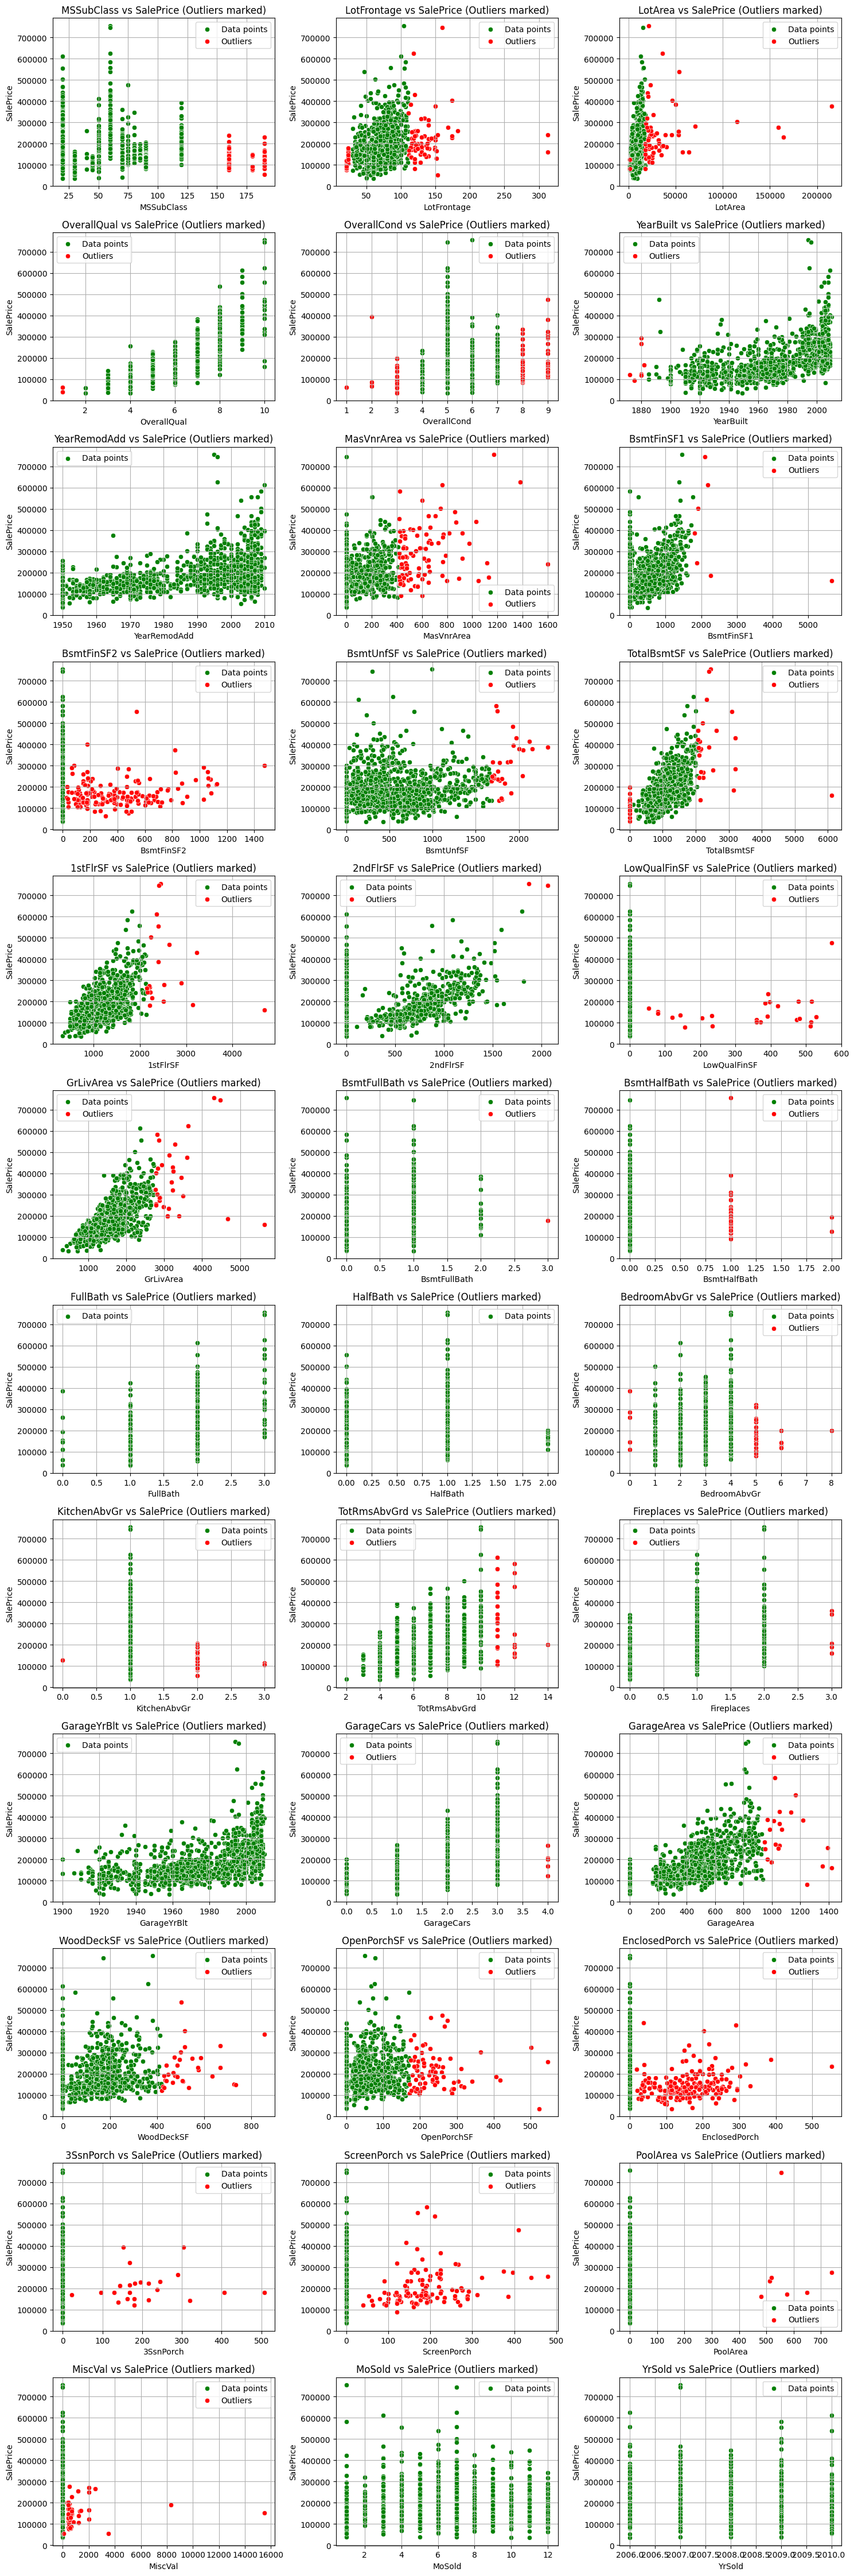

In [30]:
from scipy.stats import zscore
# Creation a grid of subplots
fig, axes = plt.subplots(12, 3, figsize=(15, 45))  # 3 columns
axes = axes.ravel()

# Loop through features and calculate Z-scores
for idx, feature in enumerate(features):
    feature_data = imputed_data[feature]

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = feature_data.quantile(0.25)
    Q3 = feature_data.quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bound to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (feature_data < lower_bound) | (feature_data > upper_bound)

     # Plot scatterplot for each feature against the target
    sns.scatterplot(x=feature_data, y=target, ax=axes[idx], color='green', label='Data points')

    # Print the outliers
    print(f"Outliers for {feature}:")
    #print(feature_data[outliers])

    # Optionally, you can add outliers to the plot in a different color
    sns.scatterplot(x=feature_data[outliers], y=target[outliers], ax=axes[idx], color='red', label='Outliers')

    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('SalePrice')
    axes[idx].set_title(f'{feature} vs SalePrice (Outliers marked)')
    axes[idx].legend()
    axes[idx].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

A house without a screen porch can still have a wide range of sale prices based on other features. Example: SalePrice values can vary even when ScreenPorch = 0

In [31]:
X = imputed_data.drop(['Id', 'SalePrice'], axis = 1)
y = imputed_data['SalePrice'].values

seed = 1111
# Get 80% of the dataset as the training set. Put the remaining 20% in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


Feature scaling

In [32]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(X_train)


In [33]:
# Initialization the classes
decision_tree= tree.DecisionTreeRegressor()
svm_regression = svm.SVR()
linear_regression = linear_model.LinearRegression()
rand_regression = RandomForestRegressor(max_depth=2, random_state=0)

# Train the models
decision_tree = decision_tree.fit(X_train_scaled, y_train)
svm_regression = svm_regression.fit(X_train_scaled, y_train)
linear_regression = linear_regression.fit(X_train_scaled, y_train)
rand_regression = rand_regression.fit(X_train_scaled, y_train)

In [34]:

def metrics(X_scaled, y_):

    # Initialization of dictionary to store results
    results = {'Model': [], 'MSE': [], 'RMSE': [], 'R² Score': []}

    # List of models and their names
    models = [
        (decision_tree, 'Decision Tree'),
        (svm_regression, 'SVM Regression'),
        (linear_regression, 'Linear Regression'),
        (rand_regression, 'Random Forest')
    ]

    # Loop over models
    for model, model_name in models:
        # Prediction on the test set
        yhat = model.predict(X_scaled)
        # Calculation MSE
        mse = mean_squared_error(y_, yhat)/2

        # Calculation RMSE
        rmse = np.sqrt(mse)

        # Calculation R² Score
        r2 = r2_score(y_, yhat)

        # Addition results to the dictionary
        results['Model'].append(model_name)
        results['MSE'].append(mse)
        results['RMSE'].append(rmse)
        results['R² Score'].append(r2)

    # Convertion of the results dictionary to a DataFrame for better visualization
    results_df = pd.DataFrame(results)

    # Print results
    print(results_df)


In [35]:
metrics(X_train_scaled,y_train)

               Model           MSE          RMSE  R² Score
0      Decision Tree  0.000000e+00      0.000000  1.000000
1     SVM Regression  3.192831e+09  56505.143832 -0.048167
2  Linear Regression  4.609874e+08  21470.617182  0.848663
3      Random Forest  9.130273e+08  30216.341458  0.700264


In [36]:
X_test_scaled = scaler_linear.transform(X_test)


In [37]:
metrics(X_test_scaled,y_test)

               Model           MSE          RMSE  R² Score
0      Decision Tree  4.614424e+08  21481.209311  0.870598
1     SVM Regression  3.622173e+09  60184.489576 -0.015760
2  Linear Regression  6.372750e+08  25244.305325  0.821290
3      Random Forest  1.026933e+09  32045.788565  0.712019


### Create the additional features

First, you will generate the polynomial features from your training set. The code below demonstrates how to do this using the [`PolynomialFeatures`]

In [38]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(X_train)

In [39]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

In [40]:
# Initialize the class
model = linear_model.LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
# Calculation MSE
mse = mean_squared_error(y_train, yhat)/2

# Calculation RMSE
rmse = np.sqrt(mse)

# Calculation R² Score
r2 = r2_score(y_train, yhat)

print(f"Training MSE: {mse}")
print(f"Training RMSE: {rmse}")
print(f"Training R2: {r2}")

Training MSE: 8.18975887375803e-20
Training RMSE: 2.861775475776887e-10
Training R2: 1.0


In [41]:
# Add the polynomial features to the cross validation set
X_test_mapped = poly.transform(X_test)

# Scale the cross validation set using the mean and standard deviation of the training set
X_test_mapped_scaled = scaler_poly.transform(X_test_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_test_mapped_scaled)
print(X_test_mapped_scaled.shape )
# Calculation MSE
mse = mean_squared_error(y_test, yhat)/2

# Calculation RMSE
rmse = np.sqrt(mse)

# Calculation R² Score
r2 = r2_score(y_test, yhat)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test R2: {r2}")

(292, 2849)
Test MSE: 2774553555.2875075
Test RMSE: 52674.03112813284
Test R2: 0.22193617957762513


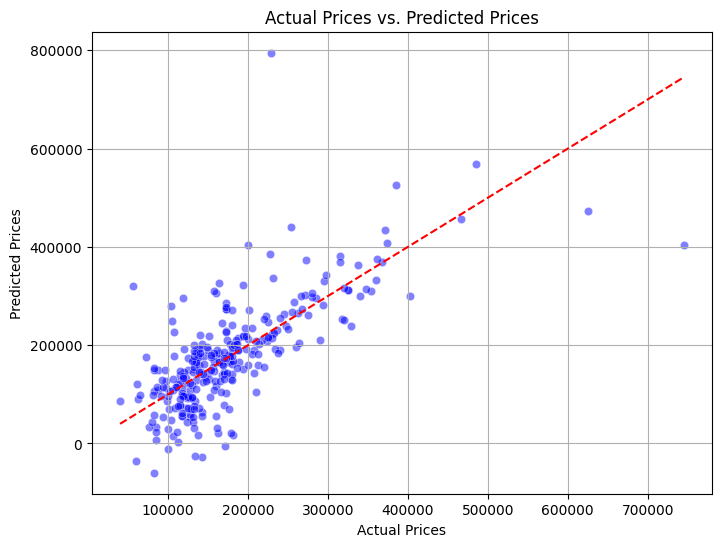

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=yhat, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.grid(True)
plt.show()

After Polynomialfeature we saw that the model performs poorly

In [43]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))
sel_.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=10))

In [44]:
selected_feat = X_train.columns[(sel_.get_support())]


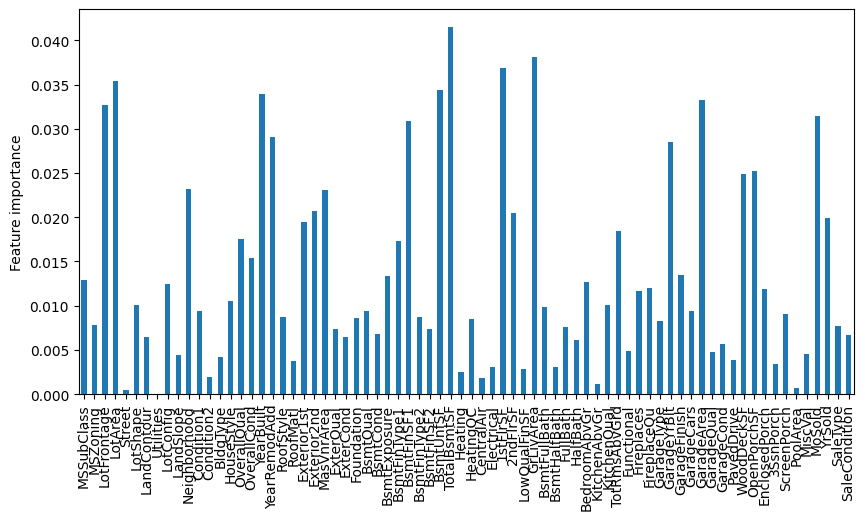

In [45]:
pd.Series(
    sel_.estimator_.feature_importances_.ravel(),
    index=X_train.columns).plot.bar(figsize=(10,5),
)
plt.ylabel('Feature importance')
plt.show()

In [46]:
X_train_selected = sel_.transform(X_train_scaled)
X_test_selected = sel_.transform(X_test_scaled)

In [47]:
# Initialize the class
model = linear_model.LinearRegression()

# Train the model
model.fit(X_train_selected, y_train )

# Compute the training MSE
yhat = model.predict(X_train_selected)
# Calculation MSE
mse = mean_squared_error(y_train, yhat)/2

# Calculation RMSE
rmse = np.sqrt(mse)

# Calculation R² Score
r2 = r2_score(y_train, yhat)

print(f"Training MSE: {mse}")
print(f"Training RMSE: {rmse}")
print(f"Training R2: {r2}")

Training MSE: 662366594.788982
Training RMSE: 25736.483730086013
Training R2: 0.7825531541798744


In [48]:
# Compute the cross validation MSE
y_test_pred = model.predict(X_test_selected)
# Calculation MSE
mse = mean_squared_error(y_test, y_test_pred)/2

# Calculation RMSE
rmse = np.sqrt(mse)

# Calculation R² Score
r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test R2: {r2}")

Test MSE: 627827148.4854509
Test RMSE: 25056.479171772135
Test R2: 0.823939390614914


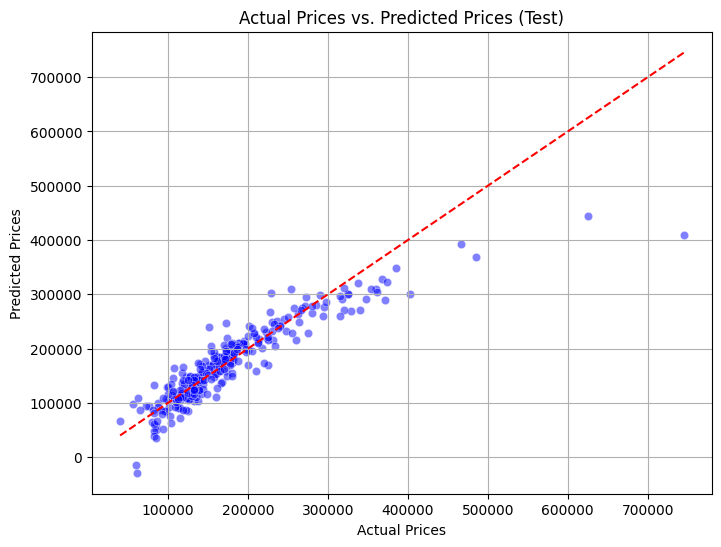

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Test)')
plt.grid(True)
plt.show()